1. Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\qiaoyuanlee\Desktop\DataScience\Machine Learning\FinalProject\USvideos_modified.csv')

In [3]:
np.random.seed(100)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   video_id                     4547 non-null   object 
 1   last_trending_date           4547 non-null   object 
 2   publish_date                 4547 non-null   object 
 3   publish_hour                 4547 non-null   int64  
 4   category_id                  4547 non-null   int64  
 5   channel_title                4547 non-null   object 
 6   views                        4547 non-null   int64  
 7   likes                        4547 non-null   int64  
 8   dislikes                     4547 non-null   int64  
 9   comment_count                4547 non-null   int64  
 10  comments_disabled            4547 non-null   bool   
 11  ratings_disabled             4547 non-null   bool   
 12  tag_appeared_in_title_count  4547 non-null   int64  
 13  tag_appeared_in_ti

In [5]:
df.describe(include='all')

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
count,4547,4547,4547,4547.000000,4547.000000,4547,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03,...,4547,4547,4339,4458,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4.525000e+03
unique,4547,110,211,NaN,NaN,1905,NaN,NaN,NaN,NaN,...,2,4540,4190,4415,NaN,NaN,NaN,NaN,NaN,NaN
top,z2kEKZ6jyQQ,2018-03-05,2018-02-05,NaN,NaN,The Tonight Show Starring Jimmy Fallon,NaN,NaN,NaN,NaN,...,True,Sia - Ho Ho Ho,The Late Show|Stephen Colbert|Colbert|Late Sho...,Jukin Media Verified (Original) * For licensin...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,200,71,NaN,NaN,49,NaN,NaN,NaN,NaN,...,3846,2,25,11,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.503189,20.416538,NaN,1.265665e+06,3.919696e+04,2.616788e+03,4.938788e+03,...,NaN,NaN,NaN,NaN,4.830658,34.429954,130.335386,437.941060,19.209369,3.164303e+06
std,NaN,NaN,NaN,6.548420,7.309226,NaN,4.526133e+06,1.419793e+05,3.662803e+04,3.110122e+04,...,NaN,NaN,NaN,NaN,2.614707,247.514298,150.400756,616.584168,12.452361,4.831613e+06
min,NaN,NaN,NaN,0.000000,1.000000,NaN,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,NaN,NaN,NaN,8.000000,17.000000,NaN,9.089650e+04,1.486000e+03,7.600000e+01,2.260000e+02,...,NaN,NaN,NaN,NaN,3.000000,5.000000,22.000000,68.000000,9.000000,2.466470e+05
50%,NaN,NaN,NaN,15.000000,24.000000,NaN,3.188400e+05,7.397000e+03,2.910000e+02,8.540000e+02,...,NaN,NaN,NaN,NaN,5.000000,6.000000,85.000000,217.000000,18.000000,1.198769e+06
75%,NaN,NaN,NaN,18.000000,25.000000,NaN,1.006673e+06,2.557550e+04,1.023000e+03,2.862500e+03,...,NaN,NaN,NaN,NaN,7.000000,7.000000,151.000000,515.000000,29.000000,3.766915e+06


2. Profile Report

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)

prof.to_notebook_iframe()

3. Data Preprocessing

In [7]:
###drop two date columns, as this information is already included in "trend.publish.diff". Dropping it will be easier to unify data type

In [8]:
df.drop(['last_trending_date', 'publish_date'], axis=1)

,video_id,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,17,22,CaseyNeistat,2564903,96321,7972,22149,False,False,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,7,24,LastWeekTonight,6109402,151250,11508,19820,False,False,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,19,23,Rudy Mancuso,5315471,187303,7278,9990,False,False,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,11,24,Good Mythical Morning,913268,16729,1386,2988,False,False,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,18,24,nigahiga,2819118,153395,2416,20573,False,False,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,CvkOWb1U-LI,19,28,Techquickie,230223,10926,446,791,False,False,...,True,Why Are Progress Bars Wrong So Often?,progress|bar|estimate|time|windows|inaccurate|...,Why do progress bars you see when installing a...,1,3,25,102,23,1980988.0
4543,_CFJ1u-DIBc,19,28,Tech Insider,128591,2924,316,564,False,False,...,True,Why Does Bluetooth Still Suck?,Tech Insider|TI|Tech|Science|Innovation|Digita...,"Bluetooth has been around for over 20 years, b...",1,3,140,407,17,1420833.0
4544,Juad74hE6rs,16,26,Gemma Stafford,55076,3436,35,621,False,False,...,True,Crazy Frosting Recipe: The Best Buttercream Fr...,Frosting|Crazy Frosting|Buttercream Frosting|B...,One Frosting. Any Flavor!\nCRAZY FROSTING RECI...,1,4,75,147,24,1549469.0
4545,n_S8d_1KVhU,18,20,Scott Manley,48505,2504,17,350,False,False,...,True,How Satellites Capture 400 Megapixel Images Of...,himawari|goes-16|goes-r|goes-s|weather|meteoro...,The Advanced Baseline Imager is the state of t...,1,4,13,20,8,692776.0


In [9]:
###drop category_id =43, as there are only 2 videos of this category, this makes the dataset unable to split into training, validation and test sets

In [10]:
df = df[df['category_id'] != 43]

<AxesSubplot:xlabel='subscriber', ylabel='views'>

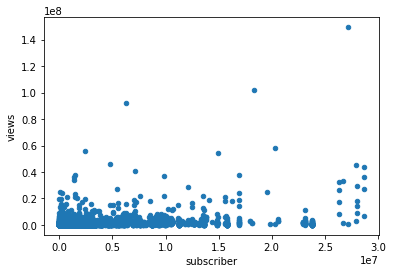

In [11]:
###Let's plot the scatter plot of subscriber and views since subscriber seems to have the highest correlation
df.plot(kind="scatter", x="subscriber",y="views")

<AxesSubplot:xlabel='trend_day_count', ylabel='views'>

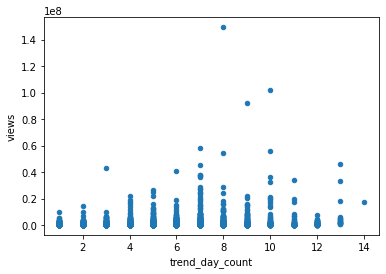

In [12]:
###plot scatter plot of trend_day_count and views since tread_day_count seems to have the second highest correlation
df.plot(kind="scatter", x="trend_day_count",y="views")

<AxesSubplot:xlabel='subscriber', ylabel='views'>

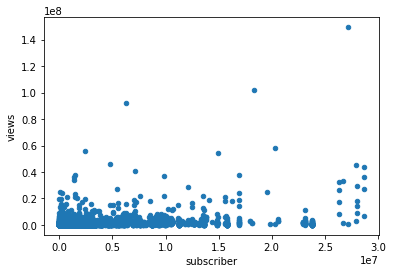

In [13]:
df.plot(kind="scatter", x="subscriber",y="views")

In [14]:
###import the mapping between category ID and category name
IDRef = pd.read_json('US_category_id.json')

In [15]:
import json
# load data using Python JSON module
with open('US_category_id.json','r') as f:
    data = json.loads(f.read())

In [16]:
IDRef2=pd.json_normalize(data, record_path="items")

In [17]:
IDRef2.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [18]:
IDCategory=IDRef2[['id','snippet.title']] ###now we show the mapping between category ID and category name
IDCategory

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [170]:
IDCategory.to_csv('IDCategory.csv')

In [19]:
###separate features as X, labels as y. views', 'likes', 'dislikes','comment_count' are considered labels. 

In [20]:
X = df.drop(['views', 'likes', 'dislikes','comment_count'], axis=1)
y = df[['views', 'likes', 'dislikes','comment_count']]

In [21]:
X.head(5)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,False,False,0,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,False,False,0,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,False,False,8,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,False,False,3,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,False,False,1,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0


In [22]:
y.head(5)

,views,likes,dislikes,comment_count
0,2564903,96321,7972,22149
1,6109402,151250,11508,19820
2,5315471,187303,7278,9990
3,913268,16729,1386,2988
4,2819118,153395,2416,20573


In [23]:
###X are transformed into data between 0 to 1, but y are views with numbers easily goes up to millions. 
###While it is not typically necessary, y is also transformed so that the scale is consistent with X, and mean square error is easier to read.

y_mean = y.mean()
y_std_dev = y.std()

y_z_scored_continuous_variables = (y - y_mean) / y_std_dev
y=y_z_scored_continuous_variables

In [24]:
###split training, validation and test dataset, it is stratified as category ID has imbalanced distribution

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42, stratify=df['category_id'], shuffle=True)

X_val, X_test, y_val, y_test = train_test_split(
     X_test, y_test, test_size=0.5, random_state=42, stratify=X_test['category_id'], shuffle=True)

In [25]:
X_train.head(5)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
2840,LNHkxOU7zz8,2018-01-25,2018-01-18,13,10,FrenchMontanaVEVO,False,False,4,True,French Montana - Famous,french montana|famous|jungle rules|future|TI|y...,Jungle Rules available at iTunes http://smartu...,7,7,80,267,11,2408862.0
719,Ft-cmkjgOlk,2017-11-28,2017-11-22,15,1,Turbo Conquering Mega Eagle,False,False,2,True,Anti Tank Crossbow!,crossbow|tank|crossbow homemade|crossbow pubg|...,The one ive been promising since i finished th...,3,6,140,252,23,10233.0
2390,qxVQ7ZEG1RU,2018-01-09,2018-01-04,0,2,yovo68,False,False,1,True,New Year's Eve Penske Peel at the 11foot8 bridge,11foot8|low clearance crash|truck crash|train ...,"On New Year's Eve 2017, the bridge got another...",2,5,1,5,5,40167.0
2499,P9mBXomW1No,2018-01-16,2018-01-10,20,23,lisbug,False,False,0,False,Recreating Princess Looks with Trendy Clothes!,Lisa Schwartz|Lisbug|Funny|Fun|Female|Comedy|Y...,Download ALICE for free here:\nApple - https:...,5,6,488,1147,8,2239082.0
4261,k8IEepWOoAQ,2018-02-25,2018-02-18,13,22,BenDeen,False,False,5,True,Korean McDonald's PyeongChang Olympics Burger,bendeen|ben deen|mukbang|taste test|mcdonalds|...,Check out my Instagram: https://www.instagram....,3,7,68,245,16,350860.0


In [26]:
X_test.head(5)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
4036,A9k89DYdHKQ,2018-02-22,2018-02-16,14,10,Janelle Monáe,False,False,2,True,Janelle Monáe - Dirty Computer [Trailer],Janelle Monae|Wonderland|Janelle|Dirty Compute...,Dirty Computer - an emotion picture by Janelle...,6,6,32,102,22,343017.0
4145,_IuEg3xbDA0,2018-03-05,2018-02-19,15,24,Complex,False,False,2,True,Michael B. Jordan Goes Sneaker Shopping With C...,sneakerhead|complex|complex originals|sneakers...,Michael B. Jordan goes Sneaker Shopping at Sta...,12,14,488,977,31,2018112.0
2384,FQfWKSdIreM,2018-01-09,2018-01-05,16,27,TED,False,False,2,True,The secret language of letter design (with Eng...,TEDTalk|TEDTalks|TEDx|TED en Español|Art|Books...,(Full English subtitles are available for this...,2,4,42,91,9,9314118.0
2902,rbQLd9Kj2VI,2018-01-26,2018-01-19,23,17,UFC - Ultimate Fighting Championship,False,False,3,True,UFC 220: Official Weigh-in,ufc|mma|ufc 220|220|francis ngannou|stipe mioc...,"Watch the UFC 220 Official Weigh-in on Friday,...",7,7,9,35,19,4381391.0
4468,2ATuTL5i0_c,2018-03-05,2018-02-28,19,26,AdelaineMorin,False,False,7,True,I tried following a Kylie Jenner Makeup Tutori...,2018|adelaine morin|beauty|channel|video|how t...,Watch More Kylie:\nReacting to Kylie's baby vi...,4,5,158,906,20,2336919.0


In [27]:
X_val.head(5)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
1946,_oZIbFolJTw,2017-12-28,2017-11-29,3,1,VOsprey22,False,False,1,True,RGB Pixel Christmas Tree,raspberry pi|ws2811|sandevices e682|christmas ...,"Christmas Tree with Trolls, Moana, and Christm...",6,29,6,19,7,16.0
4294,-HoAafTYR9w,2018-02-28,2018-02-21,22,25,Washington Post,False,False,0,False,Trump meets with students following Florida sh...,breaking news video|video updates|live video|l...,President Trump hosts a listening session at t...,5,7,57,141,8,242880.0
1443,WOUZxG1JcGI,2017-12-18,2017-12-12,1,25,VICE News,False,False,3,True,What It's Like To Be Absolutely Obsessed With ...,VICE News Tonight|VICE News|bitcoin|Vice|Jay K...,"Over the past year, the price of a Bitcoin has...",6,6,183,532,38,2727992.0
1082,YF6xzqOfCD8,2017-12-10,2017-12-04,16,27,Tom Scott,False,False,2,True,"Batman's Village of Fools: Gotham, England",tom scott|tomscott|things you might not know|g...,"There's a link from a 13th century legend, to ...",6,6,18,68,15,1096490.0
1560,arv7U6cfD40,2017-12-20,2017-12-14,17,23,Anna Akana,False,False,3,True,the life-changing magic of tidying up,anna|akana|ana|annaakana|hoarding|throwing stu...,Sign up for Mercari & start selling/buying tod...,6,6,13,50,12,2063826.0


In [28]:
###getting numerical fields, boolean fields, categorical fields and text fields
all_cols = X_train.columns

numerical_columns = X_train._get_numeric_data().columns

all_cols

Index(['video_id', 'last_trending_date', 'publish_date', 'publish_hour',
       'category_id', 'channel_title', 'comments_disabled', 'ratings_disabled',
       'tag_appeared_in_title_count', 'tag_appeared_in_title', 'title', 'tags',
       'description', 'trend_day_count', 'trend.publish.diff',
       'trend_tag_highest', 'trend_tag_total', 'tags_count', 'subscriber'],
      dtype='object')

In [29]:
numerical_columns

Index(['publish_hour', 'category_id', 'comments_disabled', 'ratings_disabled',
       'tag_appeared_in_title_count', 'tag_appeared_in_title',
       'trend_day_count', 'trend.publish.diff', 'trend_tag_highest',
       'trend_tag_total', 'tags_count', 'subscriber'],
      dtype='object')

In [30]:
boolean_columns = ['comments_disabled','ratings_disabled','tag_appeared_in_title']

In [31]:
categorical_columns = ['publish_hour','category_id']

In [32]:
num_columns=[]
for col in numerical_columns:
    if col not in boolean_columns and col not in categorical_columns:
        num_columns.append(col)

num_columns

['tag_appeared_in_title_count',
 'trend_day_count',
 'trend.publish.diff',
 'trend_tag_highest',
 'trend_tag_total',
 'tags_count',
 'subscriber']

In [33]:
text_columns=[]
for col in all_cols:
    if col not in numerical_columns and col not in categorical_columns:
        text_columns.append(col)

text_columns

['video_id',
 'last_trending_date',
 'publish_date',
 'channel_title',
 'title',
 'tags',
 'description']

In [34]:
###Perform one hot encoding to transform categorical fields
train_one_hot_features = pd.get_dummies(X_train[categorical_columns].astype(str), drop_first=True).astype(int)
#train_one_hot_features

In [35]:
train_boolean_features = X_train[[col for col in boolean_columns]].astype(int)
#train_boolean_features

In [36]:
X_train_num = X_train[[col for col in num_columns]]
#X_train_num

In [37]:
X_train_num_cat=pd.merge(X_train_num,train_one_hot_features,left_index=True, right_index=True)

X_train_num_cat_boo=pd.merge(X_train_num_cat,train_boolean_features,left_index=True, right_index=True)
#X_train_num_cat_boo   ###combining all fields except text fileds, which will only be used in key word extaction section

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = "median")),
        ('std_scaler', StandardScaler())
    ])

X_train_num_transformed = num_pipeline.fit_transform(X_train_num)

In [39]:
#X_train_num_transformed

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('boo', 'passthrough', boolean_columns) 
    ])

X_train_num_cat_boo_transformed = pd.DataFrame(num_pipeline.fit_transform(X_train_num_cat_boo), columns = X_train_num_cat_boo.columns)

In [41]:
###training dataset now is completely transformed. Numerical data are scaled, categorical data are one hot encoded, boolean variables are transformed to 1 and 0.
X_train_num_cat_boo_transformed.head(5)

,tag_appeared_in_title_count,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber,publish_hour_1,publish_hour_10,publish_hour_11,...,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,comments_disabled,ratings_disabled,tag_appeared_in_title
0,0.415253,0.831724,-0.112682,-0.339951,-0.280767,-0.656847,-0.161896,-0.172443,-0.118081,-0.151897,...,-0.302054,-0.565916,-0.325846,-0.315941,-0.200114,-0.261666,-0.052515,-0.12843,-0.076218,0.428928
1,-0.385734,-0.703961,-0.116717,0.054359,-0.304607,0.307245,-0.651231,-0.172443,-0.118081,-0.151897,...,-0.302054,-0.565916,-0.325846,-0.315941,-0.200114,-0.261666,-0.052515,-0.12843,-0.076218,0.428928
2,-0.786227,-1.087882,-0.120751,-0.859125,-0.697168,-1.138893,-0.645124,-0.172443,-0.118081,-0.151897,...,-0.302054,-0.565916,-0.325846,-0.315941,-0.200114,-0.261666,-0.052515,-0.12843,-0.076218,0.428928
3,-1.186720,0.063881,-0.116717,2.341355,1.117833,-0.897870,-0.196532,-0.172443,-0.118081,-0.151897,...,3.310669,-0.565916,-0.325846,-0.315941,-0.200114,-0.261666,-0.052515,-0.12843,-0.076218,-2.331394
4,0.815746,-0.703961,-0.112682,-0.418813,-0.315732,-0.255142,-0.581741,-0.172443,-0.118081,-0.151897,...,-0.302054,-0.565916,-0.325846,-0.315941,-0.200114,-0.261666,-0.052515,-0.12843,-0.076218,0.428928


In [42]:
X_train_num_cat_boo_transformed.columns

Index(['tag_appeared_in_title_count', 'trend_day_count', 'trend.publish.diff',
       'trend_tag_highest', 'trend_tag_total', 'tags_count', 'subscriber',
       'publish_hour_1', 'publish_hour_10', 'publish_hour_11',
       'publish_hour_12', 'publish_hour_13', 'publish_hour_14',
       'publish_hour_15', 'publish_hour_16', 'publish_hour_17',
       'publish_hour_18', 'publish_hour_19', 'publish_hour_2',
       'publish_hour_20', 'publish_hour_21', 'publish_hour_22',
       'publish_hour_23', 'publish_hour_3', 'publish_hour_4', 'publish_hour_5',
       'publish_hour_6', 'publish_hour_7', 'publish_hour_8', 'publish_hour_9',
       'category_id_10', 'category_id_15', 'category_id_17', 'category_id_19',
       'category_id_2', 'category_id_20', 'category_id_22', 'category_id_23',
       'category_id_24', 'category_id_25', 'category_id_26', 'category_id_27',
       'category_id_28', 'category_id_29', 'comments_disabled',
       'ratings_disabled', 'tag_appeared_in_title'],
      dtype='obj

In [43]:
final_y_train=y_train['views']
final_y_train

2840    0.735249
719    -0.274521
2390   -0.195631
2499   -0.263719
4261   -0.268629
          ...   
3779   -0.212832
3314    0.032556
255    -0.248474
641     0.311971
740    -0.275514
Name: views, Length: 3636, dtype: float64

In [44]:
def preprocess_data(X, y):
    
    X_num = X[[col for col in num_columns]]
    
    one_hot_features = pd.get_dummies(X[categorical_columns].astype(str), drop_first=True).astype(int)
    
    boolean_features = X[[col for col in boolean_columns]].astype(int)
    
    X_num_cat=pd.merge(X_num,one_hot_features,left_index=True, right_index=True)

    X_num_cat_boo=pd.merge(X_num_cat,boolean_features,left_index=True, right_index=True)
    
    
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = "median")),
        ('std_scaler', StandardScaler())
    ])

    X_num_transformed = num_pipeline.fit_transform(X_num)
    
    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('boo', 'passthrough', boolean_columns) 
    ])

    X_num_cat_boo_transformed = pd.DataFrame(num_pipeline.fit_transform(X_num_cat_boo), columns = X_num_cat_boo.columns)
    
   
    final_y = y['views']
    
    return X_num_cat_boo_transformed, final_y

In [45]:
#preprocess_data(X_train, y_train)

In [46]:
###also preprocess test data
X_test_num_cat_boo_transformed, final_y_test= preprocess_data(X_test, y_test)

In [47]:
X_test_num_cat_boo_transformed.columns

Index(['tag_appeared_in_title_count', 'trend_day_count', 'trend.publish.diff',
       'trend_tag_highest', 'trend_tag_total', 'tags_count', 'subscriber',
       'publish_hour_1', 'publish_hour_10', 'publish_hour_11',
       'publish_hour_12', 'publish_hour_13', 'publish_hour_14',
       'publish_hour_15', 'publish_hour_16', 'publish_hour_17',
       'publish_hour_18', 'publish_hour_19', 'publish_hour_2',
       'publish_hour_20', 'publish_hour_21', 'publish_hour_22',
       'publish_hour_23', 'publish_hour_3', 'publish_hour_4', 'publish_hour_5',
       'publish_hour_6', 'publish_hour_7', 'publish_hour_8', 'publish_hour_9',
       'category_id_10', 'category_id_15', 'category_id_17', 'category_id_19',
       'category_id_2', 'category_id_20', 'category_id_22', 'category_id_23',
       'category_id_24', 'category_id_25', 'category_id_26', 'category_id_27',
       'category_id_28', 'category_id_29', 'comments_disabled',
       'ratings_disabled', 'tag_appeared_in_title'],
      dtype='obj

In [48]:
X_val_num_cat_boo_transformed, final_y_val = preprocess_data(X_val, y_val)

2.Baseline

In [49]:
from sklearn.linear_model import SGDRegressor

<AxesSubplot:>

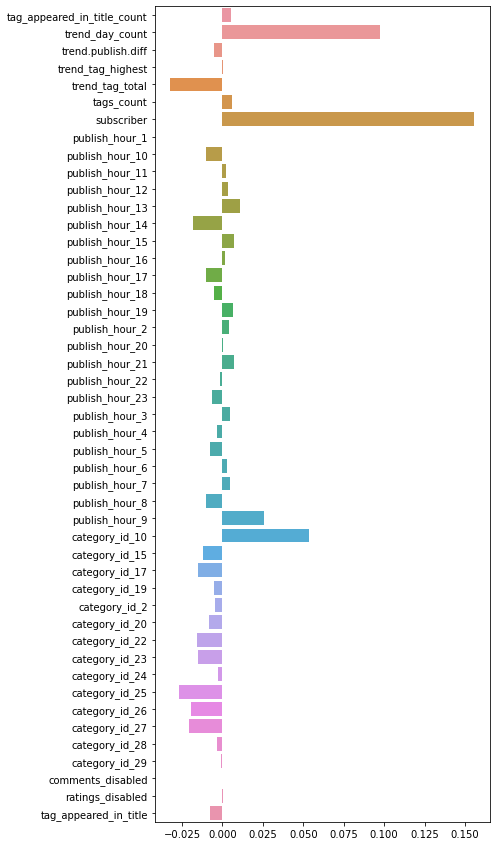

In [50]:
###First baseline model is SGD Regressor
np.random.seed(50)

lr = SGDRegressor(penalty='l2',alpha=0.5) 

lr.fit(X_train_num_cat_boo_transformed, final_y_train)

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(y=X_train_num_cat_boo_transformed.columns, x=list(lr.coef_))

In [51]:
#lr.coef_

In [52]:
#final_y_train2=final_y_train.sort_index().reset_index(drop=True)
#final_y_train2

In [53]:
#from statsmodels.api import OLS
#OLS(final_y_train2, X_train_num_cat_boo_transformed).fit().summary()

In [54]:
#X_train_num_cat_boo_transformed

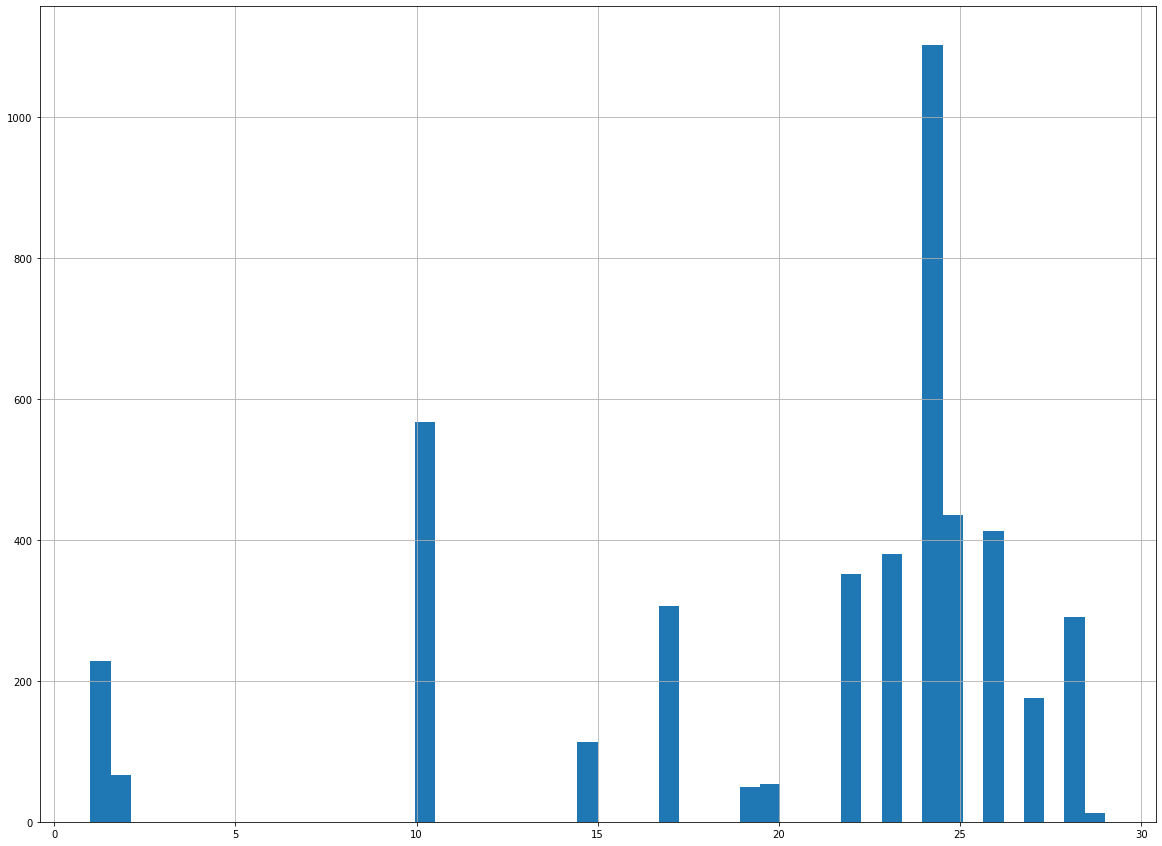

In [55]:
import matplotlib.pyplot as plt
df['category_id'].hist(bins=50, figsize=(20,15))
#fig = df['category_id'].hist(bins=50,figsize=(20,15))

#fig.set_xticks(np.arange(len(df['category_id'])))
#fig.set_xticklabels(df['category_id'])
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, max_error, mean_absolute_error
def report_regression_metrics(model, X, y, plots=False, y_pred = []):
    if not len(y_pred):
        y_pred = model.predict(X)
    if plots:
        
        plt.figure()
        sns.distplot(y - y_pred) 
        plt.figure()
        sns.scatterplot(x=y, y=y_pred)
        
    print("MSE:", mean_squared_error(y, y_pred))
    print("R2 score:", r2_score(y, y_pred))
    print("Max error:", max_error(y, y_pred))
    print("mean_absolute_error:", mean_absolute_error(y, y_pred))

In [57]:
print("Train metrics:")
report_regression_metrics(lr, X_train_num_cat_boo_transformed, final_y_train)

print("Val metrics:")
report_regression_metrics(lr, X_val_num_cat_boo_transformed, final_y_val)

print("Test metrics:")
report_regression_metrics(lr, X_test_num_cat_boo_transformed, final_y_test)


Train metrics:
MSE: 0.7344962565711444
R2 score: 0.11939031430126612
Max error: 31.857951783164776
mean_absolute_error: 0.2765653295793656
Val metrics:
MSE: 2.689889893603196
R2 score: 0.06997946363030827
Max error: 21.37549965505976
mean_absolute_error: 0.40276078347990213
Test metrics:
MSE: 0.37960934043689365
R2 score: 0.09318471198321554
Max error: 9.338034382342075
mean_absolute_error: 0.24540328391991467


In [58]:
#from sklearn.linear_model import LogisticRegression

#logit_reg = LogisticRegression(penalty='l2', solver='saga', random_state=0)
#logit_reg.fit(X_train_num_cat_boo_transformed, final_y_train)


In [59]:
#print("Train metrics:")
#report_regression_metrics(logit_reg, X_train_num_cat_boo_transformed, final_y_train)

#print("Val metrics:")
#report_regression_metrics(logit_reg, X_val_num_cat_boo_transformed, final_y_val)

#print("Test metrics:")
#report_regression_metrics(logit_reg, X_test_num_cat_boo_transformed, final_y_test)

3.Decision Tree Model

In [60]:
###First a naive try, use all default hyperparameters
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_num_cat_boo_transformed, final_y_train)

DecisionTreeRegressor()

In [61]:
tree_reg.score(X_train_num_cat_boo_transformed, final_y_train)

0.9997656217537556

In [62]:
print("Train metrics:")
report_regression_metrics(tree_reg, X_train_num_cat_boo_transformed, final_y_train)

print("Val metrics:")
report_regression_metrics(tree_reg, X_val_num_cat_boo_transformed, final_y_val)

print("Test metrics:")
report_regression_metrics(tree_reg, X_test_num_cat_boo_transformed, final_y_test)

Train metrics:
MSE: 0.000195489496974629
R2 score: 0.9997656217537556
Max error: 0.39131943679256836
mean_absolute_error: 0.0008658179282522622
Val metrics:
MSE: 3.116949719843167
R2 score: -0.07767505918349249
Max error: 22.116870214293986
mean_absolute_error: 0.4731039020705925
Test metrics:
MSE: 0.8707775022577902
R2 score: -1.080123609707921
Max error: 9.514263564346729
mean_absolute_error: 0.35491017413671133


C:\Users\qiaoyuanlee\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

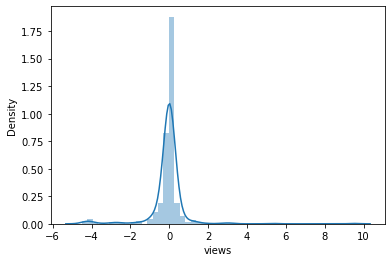

In [63]:
prediction_tree_reg=tree_reg.predict(X_test_num_cat_boo_transformed)
# checking difference between labled y and predicted y
sns.distplot(final_y_test-prediction_tree_reg)

In [64]:
###Next, use grid search CV to tune up the model
parameters={"max_depth" : [3,5,None],
           "min_samples_leaf":[1,2,5,10],
           "min_weight_fraction_leaf":[0.01,0.05,0.1,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30] }

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
tune_tree_reg=GridSearchCV(tree_reg,param_grid=parameters,scoring='r2',cv=10,verbose=3)

In [67]:
tune_tree_reg.fit(X_train_num_cat_boo_transformed, final_y_train)
tune_tree_reg.best_score_
tune_tree_reg.best_params_

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV 1/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01;, score=0.423 total time=   0.0s
[CV 2/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01;, score=0.041 total time=   0.0s
[CV 3/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01;, score=0.028 total time=   0.0s
[CV 4/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01;, score=-0.275 total time=   0.0s
[CV 5/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01;, score=0.260 total time=   0.0s
[CV 6/10] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01;, score=0.144 total time=   0.0s
[CV 7/10] END max_depth=3, max_fea

{'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.01}

In [68]:
new_tree_reg = DecisionTreeRegressor(max_depth=5, 
                                     min_weight_fraction_leaf=0.01, 
                                     max_features='log2',
                                     max_leaf_nodes=10)
new_tree_reg.fit(X_train_num_cat_boo_transformed, final_y_train)

DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.01)

In [69]:
print("Train metrics:")
report_regression_metrics(new_tree_reg, X_train_num_cat_boo_transformed, final_y_train)

print("Val metrics:")
report_regression_metrics(new_tree_reg, X_val_num_cat_boo_transformed, final_y_val)

print("Test metrics:")
report_regression_metrics(new_tree_reg, X_test_num_cat_boo_transformed, final_y_test)

Train metrics:
MSE: 0.8189717210516807
R2 score: 0.018110135457694132
Max error: 32.70015294021731
mean_absolute_error: 0.30769678477707585
Val metrics:
MSE: 2.7956485425696016
R2 score: 0.03341376044990141
Max error: 21.855740483507
mean_absolute_error: 0.4359212841881029
Test metrics:
MSE: 0.3976241804240572
R2 score: 0.050150648878407034
Max error: 9.469302791231522
mean_absolute_error: 0.27195544862456145


In [70]:
#from sklearn.tree import export_graphviz
#from io import StringIO
#import pydotplus
#from IPython.display import Image

#dot_data = StringIO()
#export_graphviz(tree_reg, 
                     #out_file=dot_data,
                     #class_names=['...low', '.high'],
                     #feature_names=X_train_num_cat_boo_transformed.columns, # the feature names.
                     #filled=True, # Whether to fill in the boxes with colours.
                     #rounded=True, # Whether to round the corners of the boxes.
                     #special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())

4. Random Forest

In [71]:
###First use all default hyperparameters
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_num_cat_boo_transformed, final_y_train)

RandomForestRegressor()

In [72]:
print("Train metrics:")
report_regression_metrics(forest_reg, X_train_num_cat_boo_transformed, final_y_train)

print("Val metrics:")
report_regression_metrics(forest_reg, X_val_num_cat_boo_transformed, final_y_val)

print("Test metrics:")
report_regression_metrics(forest_reg, X_test_num_cat_boo_transformed, final_y_test)

Train metrics:
MSE: 0.10991772074933061
R2 score: 0.868216333771861
Max error: 10.928440542608563
mean_absolute_error: 0.09865090194653872
Val metrics:
MSE: 2.9118657106149404
R2 score: -0.006767941120087384
Max error: 20.822790695835952
mean_absolute_error: 0.4440754593088901
Test metrics:
MSE: 0.6937582563920093
R2 score: -0.6572579388065021
Max error: 9.314944235286072
mean_absolute_error: 0.32631456039438833


In [73]:
parameters={"max_depth" : [3,5,None],
           "min_samples_split":[1,2,5,10],
           "min_samples_leaf":[1,2,5,10],
           "min_weight_fraction_leaf":[0.01,0.05,0.1,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30],
           "bootstrap" :[True, False],
           'n_estimators': [100, 200, 500, 1000, 2000]
           }

In [74]:
#tune_forest_reg=GridSearchCV(forest_reg,param_grid=parameters,scoring='r2',cv=3,verbose=3)
#tune_forest_reg.fit(X_train_num_cat_boo_transformed, final_y_train)
#tune_forest_reg.best_score_
#tune_forest_reg.best_params_


#Running time of this was too long

In [75]:
###Next ,try randomized search CV to fine tune hyperparameters
from sklearn.model_selection import RandomizedSearchCV

randomTune_forest_reg=RandomizedSearchCV(forest_reg, param_distributions=parameters,n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
randomTune_forest_reg.fit(X_train_num_cat_boo_transformed, final_y_train)
randomTune_forest_reg.best_score_
randomTune_forest_reg.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\qiaoyuanlee\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [ 1.34663458e-02  1.65755555e-01  4.51724190e-02  4.00449896e-03
  6.37023174e-02             nan  1.34663458e-02  8.24296876e-02
  4.41223186e-02  1.06692532e-01  1.45279715e-01  6.37023174e-02
             nan  6.56867271e-02             nan             nan
  1.07423218e-01  5.10895351e-02  4.69939129e-02             nan
  1.12791944e-01  8.43146959e-02  1.79988879e-03             nan
 -6.45479311e-04  7.65155650e-02  6.56867271e-02  7.54769333e-02
  7.22675310e-02  1.07869904e-01  1.34663458e-02  1.08394626e-01
             nan -4.63902977e-04  6.27579426e-02  5.32713330e-02
  8.01159899e-02  1.51600398e-02  7.72316780e-02 -4.28094628e-04
  6.37023174e-02             nan  1.08943495e-01  4.40666871e-02
 -2.20914957e-05             nan  8.01026492e-02  5.08895634e-02
  1.65413604e-02  5.14205826e-02  1.34663458e-02  5.08846148e-02
  7.97

{'n_estimators': 1000,
 'min_weight_fraction_leaf': 0.01,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_leaf_nodes': None,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [76]:
new_forest_reg = RandomForestRegressor(n_estimators=1000,
 min_weight_fraction_leaf= 0.01,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_leaf_nodes= None,
 max_features= 'auto',
 max_depth= 5,
 bootstrap= True)
new_forest_reg.fit(X_train_num_cat_boo_transformed, final_y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2,
                      min_weight_fraction_leaf=0.01, n_estimators=1000)

In [77]:
print("Train metrics:")
report_regression_metrics(new_forest_reg, X_train_num_cat_boo_transformed, final_y_train)

print("Val metrics:")
report_regression_metrics(new_forest_reg, X_val_num_cat_boo_transformed, final_y_val)

print("Test metrics:")
report_regression_metrics(new_forest_reg, X_test_num_cat_boo_transformed, final_y_test)

Train metrics:
MSE: 0.6279840827294776
R2 score: 0.24709096776363537
Max error: 30.072735985779257
mean_absolute_error: 0.2519988525427156
Val metrics:
MSE: 2.4940161387713595
R2 score: 0.13770216669063007
Max error: 19.791326732364727
mean_absolute_error: 0.3741468160422881
Test metrics:
MSE: 0.44818558030009975
R2 score: -0.07063102192652249
Max error: 9.493613414466473
mean_absolute_error: 0.2681424252993806


5. Neural Network

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [79]:
%load_ext tensorboard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [80]:
n_features = X_train_num_cat_boo_transformed.shape[1]
n_classes = 1

In [81]:
n_features

47

In [82]:
n_classes

1

In [145]:
# fresh start
keras.backend.clear_session()
model = Sequential()

# define your model
model.add(Dense(12, input_dim=n_features, activation='sigmoid'))
model.add(Dense(n_classes, activation='sigmoid'))
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']
                       )
print(model.summary())

# train your model
history_callback = model.fit(X_train_num_cat_boo_transformed, final_y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=1,
                                 validation_data=(X_val_num_cat_boo_transformed, final_y_val),
                                 callbacks=[tb_cb])

score_test = model.evaluate(X_test_num_cat_boo_transformed, final_y_test, verbose=0)
score_val = model.evaluate(X_val_num_cat_boo_transformed, final_y_val, verbose=0)
score_train = model.evaluate(X_train_num_cat_boo_transformed, final_y_train, verbose=0)

print('Test mean_squared_error:', score_test[0])
print('Test mean_absolute_error:', score_test[1])
print('Test mean_absolute_percentage_error:', score_test[2])

print('Val mean_squared_error:', score_val[0])
print('Val mean_absolute_error:', score_val[1])
print('Val mean_absolute_percentage_error:', score_val[2])

print('Train mean_squared_error:', score_train[0])
print('Train mean_absolute_error:', score_train[1])
print('Train mean_absolute_percentage_error:', score_train[2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 589
Trainable params: 589
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
728/728 [==============================] - 2s 3ms/step - loss: 0.9111 - mean_squared_error: 0.9111 - mean_absolute_error: 0.5130 - mean_absolute_percentage_error: 488.4093 - val_loss: 2.8066 - val_mean_squared_error: 2.8066 - val_mean_absolute_error: 0.5378 - val_mean_absolute_percentage_error: 244.8183
Epoch 2/50
728/728 [==============================] - 1s 2ms/step - loss: 0.8043 - mean_squared_error: 0.8043 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 281.7326 - val_loss: 2.78

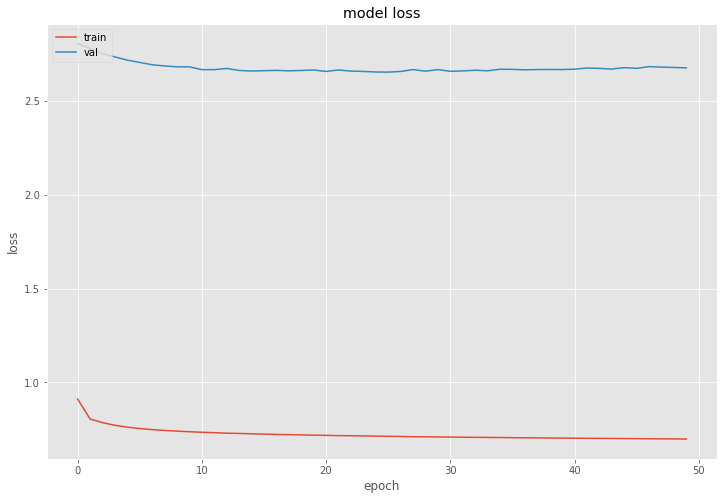

In [146]:
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

6. NLP and Text

In [84]:
from datetime import timedelta, datetime

import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#from sklearn.tree import DecisionTreeRegressor
#from sklearn import tree
#from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
#from sklearn.model_selection import cross_val_score


pd.options.mode.chained_assignment = None

import nltk
nltk.download('punkt')

from nltk import word_tokenize
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qiaoyuanlee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [149]:
words = df['tags'].str.lower().str.cat(sep='|')
word_tokens = word_tokenize(words)

word_counter = Counter(word_tokens)
print('{} different words'.format(len(word_counter)))

###Get key words, and manually categorize them

38343 different words


In [150]:
word_counter.most_common(250)

[('the', 885),
 ('of', 733),
 ('to', 729),
 ('and', 601),
 ('a', 415),
 ("'s", 406),
 (':', 391),
 ('in', 333),
 ('(', 265),
 (')', 261),
 ('with', 257),
 ('&', 254),
 ('late', 228),
 ('on', 224),
 ('for', 194),
 ('is', 172),
 ('you', 169),
 ('it', 152),
 ('new', 152),
 ('vs', 149),
 ('!', 149),
 ('.', 145),
 ('bowl', 141),
 ('last', 138),
 ('wars', 136),
 ('my', 135),
 ('make', 129),
 ('music', 126),
 ('’', 123),
 ('me', 113),
 ('life', 108),
 ('your', 106),
 ('york', 106),
 ('night', 104),
 ('x', 103),
 ('voice', 100),
 ('super', 99),
 ('i', 98),
 ('#', 97),
 ('show', 90),
 ('by', 89),
 ('star', 85),
 ('tv|television|funny|talk', 77),
 ('up', 77),
 ('season', 76),
 ('official', 74),
 ('school', 74),
 ('we', 73),
 ('makeup', 71),
 ('norton', 70),
 ('s', 70),
 ('are', 69),
 ('be', 68),
 ('video|funny', 65),
 ('show|stephen', 64),
 ('at', 63),
 ('tv', 62),
 ('youtube|youtube', 61),
 ("n't", 61),
 ('do', 61),
 ('b', 61),
 ('game', 60),
 ('all', 57),
 ('news', 56),
 ('2', 55),
 ('original

In [151]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

#sports_keywords = ['super','game','bowl','nfl','espn','nba','olympics','hd','live','season','official']
sports_keywords = ['bowl','super','official','tv','game','live','wrestling']

sports_keywords_set = set([ps.stem(tok) for tok in sports_keywords]) # stem the keywords 
sports_keywords_dict = {ps.stem(tok):tok for tok in sports_keywords} # use this dictionary to revert the stemmed words back to the original.

#show_keywords = ['trailer','live','hd','show','star','movie','war','season','refinery29','nbc','snl','netlfix','music','kardashian','teaser','official']
show_keywords = ['war','music','voice','night','show','star','season','official','tv','original','live','fallon','norton','graham','cobert','ellen','kardashian','meyers','kimmel']
show_keywords_set = set([ps.stem(tok) for tok in show_keywords]) 
show_keywords_dict = {ps.stem(tok):tok for tok in show_keywords} 

#politics_keywords = ['trump','news','world','president','bbc','nbc']
politics_keywords = ['trump','news','tv']
politics_keywords_set = set([ps.stem(tok) for tok in politics_keywords]) 
politics_keywords_dict = {ps.stem(tok):tok for tok in politics_keywords} 



###organize key words

In [152]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# clean the titles.
def prepare_title(desc):
    # tokenize titles.
    tokens = word_tokenize(desc)
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in tokens]
    return set(stemmed_tokens)

df['title_word_set'] = df['title'].map(prepare_title)

###prepare title

In [153]:
df['title_word_set'].iloc[10]

{'!',
 "'",
 '10',
 '103-yd',
 "can't-miss",
 'denver',
 'dion',
 'highlight',
 'kick',
 'lewi',
 'nfl',
 'play',
 'return',
 'td',
 'vs.',
 'wk',
 '|'}

In [154]:
sports_list = []
show_list = []
politics_list = []

#msk = df['title'] != '' # 

num_postings = len(df.index)
for i in range(num_postings):
    title_desc = df.iloc[i]['title'].lower()
    title_desc_set = df.iloc[i]['title_word_set']
    
    # Look for exact match by token.
    sports_words = sports_keywords_set.intersection(title_desc_set)
    show_words = show_keywords_set.intersection(title_desc_set)
    politics_words = politics_keywords_set.intersection(title_desc_set)
    
   # label the title with no sports keywords.
    if len(sports_words) == 0:
        sports_list.append('not found')
    
    # now for politics
    if len(politics_words) == 0:
        politics_list.append('not found')
    
    # now for show
    if len(show_words) == 0:
        show_list.append('not found')
    
    sports_list += list(sports_words)
    show_list += list(show_words)
    politics_list += list(politics_words)
    
###find key words obtianed from tags in titles

In [91]:
#sports_list

In [155]:
df_sports = pd.DataFrame(data={'cnt': sports_list})
df_sports = df_sports.replace(sports_keywords_dict)

df_sports_top50 = df_sports['cnt'].value_counts().reset_index().rename(columns={'index': 'sports'}).iloc[:50]

#obtain key words frequency in each category. Top 50 is an arbitrarily large enough number.

In [157]:
df_sports_top50

,sports,cnt
0,not found,3949
1,official,311
2,live,132
3,game,74
4,super,65
5,bowl,59
6,tv,23
7,wrestling,2


In [158]:
df_show = pd.DataFrame(data={'cnt': show_list})
df_show = df_show.replace(show_keywords_dict)

df_show_top50 = df_show['cnt'].value_counts().reset_index().rename(columns={'index': 'show'}).iloc[:50]


In [159]:
df_show_top50

,show,cnt
0,not found,3696
1,official,311
2,live,132
3,star,96
4,show,93
5,music,90
6,war,74
7,season,52
8,night,39
9,kardashian,26


In [160]:
df_politics = pd.DataFrame(data={'cnt': politics_list})
df_politics = df_politics.replace(politics_keywords_dict)

df_politics_top50 = df_politics['cnt'].value_counts().reset_index().rename(columns={'index': 'politics'}).iloc[:50]


In [161]:
df_politics_top50

,politics,cnt
0,not found,4450
1,trump,69
2,tv,23
3,news,4
